*Seismogram's from Shihao's input file*

input file

 This is an SW4 input file for problem LOH.1 from the 
#SCEC test suite, see
 "Steven Day et al., Tests of 3D Elastodynamic Codes:
#Final report for lifelines project 1A01, Pacific Eartquake
#Engineering Center, 2001".

#First we set up a grid with a spacing h (=20,40,50)
 over a domain (X x Y x Z) 30000 x 30000 x 17000.
#It will run from time t=0 to t=9

#The material properties are given by the
#block commands. They describe a layer
 on top of a half-space in the z-direction

 The solution is recorded at different locations
#and saved in different sac-files  (in the LOH_1 directory)

 A single moment point source is used with 
 the time dependency being the Gaussian function

grid h=25 nx=201 ny=201 nz=201
time steps=500
fileio path=Apr16_3

#specify the width of the super grid damping layer (30 is the default)
supergrid gp=40

block vp=5800 vs=3200 rho=2000



#Gaussian time function gives the velocities directly
#sigma=0.05 gives freq=1/sigma=20 (LOH.3)
#sigma=0.06 gives freq=1/sigma=16.6667 (LOH.1)
#t0 = 6*sigma = 0.36 avoids (most) startup transients and is
#consistent with the matlab script PlotAnalyticalLOH1.m
source x=1500 y=1000 z=1000 Mxx=1e15 Myy=1e15 Mzz=1e15 Mxy=0 Mxz=0 Myz=0 t0=0.5 freq=8.0 type=Ricker


#Note that all recording stations are relative to the (0,0,0) origin

rec x=2000 y=2000 z=1000 file=sta01 variables=acceleration sacformat=1 usgsformat=0
rec x=2000 y=2000 z=1000 file=sta01 sacformat=1 usgsformat=0
rec x=2000 y=2000 z=0 file=sta02 variables=acceleration sacformat=1 usgsformat=0
rec x=2000 y=2000 z=0 file=sta02 sacformat=1 usgsformat=0
rec x=2000 y=2000 z=3000 file=sta03 variables=acceleration sacformat=1 usgsformat=0
rec x=2000 y=2000 z=3000 file=sta03 sacformat=1 usgsformat=0
rec x=2000 y=2000 z=3500 file=sta04 variables=acceleration sacformat=1 usgsformat=0
rec x=2000 y=2000 z=3500 file=sta04 sacformat=1 usgsformat=0
rec x=2000 y=2000 z=4000 file=sta05 variables=acceleration sacformat=1 usgsformat=0
rec x=2000 y=2000 z=4000 file=sta05 sacformat=1 usgsformat=0


#material images
#image mode=mu z=0 file=hor cycle=0
#image mode=lambda z=0 file=hor cycle=0
#image mode=rho z=0 file=hor cycle=0

#image mode=lambda y=15e3 file=ver cycle=0
#image mode=mu y=15e3 file=ver cycle=0
#image mode=rho y=15e3 file=ver cycle=0

#solution images
#image mode=ux y=4000 file=surf_ux timeInterval=0.5
#image mode=curl y=4000 file=surf_ux timeInterval=0.5



#no point saving uz and ux on this plane, because they are zero by symmetry
#image mode=uy y=15e3 file=ver timeInterval=0.5



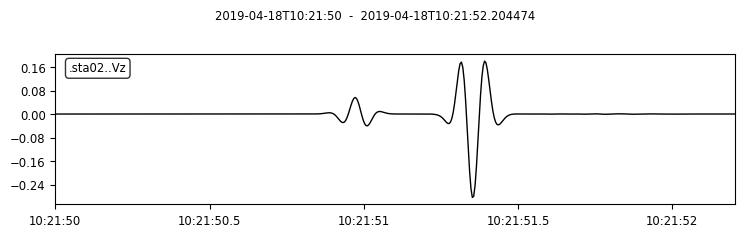

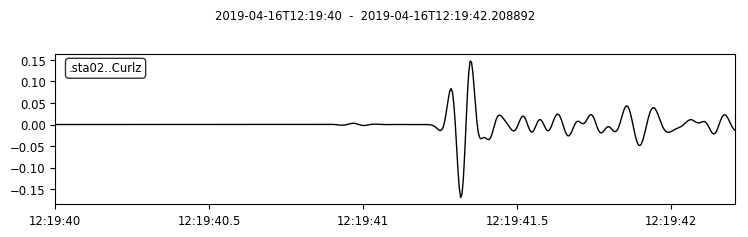

In [274]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

import obspy
from obspy import read
factor = 1666
#Rotational components of 1st station in x, y and z direction
st1_curlx = read('/home/ashah/Desktop/Apr16_3/sta01.curlx')
st1_curly = read('/home/ashah/Desktop/Apr16_3/sta01.curly')
st1_curlz = read('/home/ashah/Desktop/Apr16_3/sta01.curlz')
st2_curlx = read('/home/ashah/Desktop/Apr16_3/sta02.curlx')
st2_curly = read('/home/ashah/Desktop/Apr16_3/sta02.curly')
st2_curlz = read('/home/ashah/Desktop/Apr16_3/sta02.curlz')
#Translation components of displacement in x, y and z direction
st1_x = read('/home/ashah/Desktop/Apr16_3/sta01.x')
st1_y = read('/home/ashah/Desktop/Apr16_3/sta01.y')
st1_z = read('/home/ashah/Desktop/Apr16_3/sta01.z')
st2_x = read('/home/ashah/Desktop/Apr16_3/sta02.x')
st2_y = read('/home/ashah/Desktop/Apr16_3/sta02.y')
st2_z = read('/home/ashah/Desktop/Apr16_3/sta02.z')
#Translation components of acceleration in x, y and z direction
st1_xv = read('/home/ashah/Desktop/Apr16_3/sta01.xv')
st1_yv = read('/home/ashah/Desktop/Apr16_3/sta01.yv')
st1_zv = read('/home/ashah/Desktop/Apr16_3/sta01.zv')
st2_xv = read('/home/ashah/Desktop/Apr16_3/sta02.xv')
st2_yv = read('/home/ashah/Desktop/Apr16_3/sta02.yv')
st2_zv = read('/home/ashah/Desktop/Apr16_3/sta02.zv')



st1_curlx[0].data = st1_curlx[0].data * 1666.6667
st1_curly[0].data = st1_curly[0].data * -7500
st1_curlz[0].data = st1_curlz[0].data * -10e+5

st2_curlx[0].data = st2_curlx[0].data * 1666.6667
st2_curly[0].data = st2_curly[0].data * -7500
st2_curlz[0].data = st2_curlz[0].data * -1333333.333


st2_zv.plot()
st2_curlz.plot()





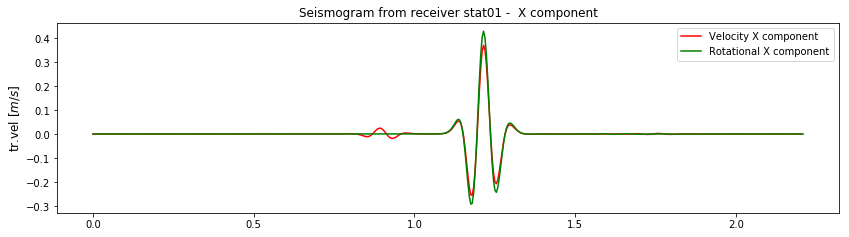

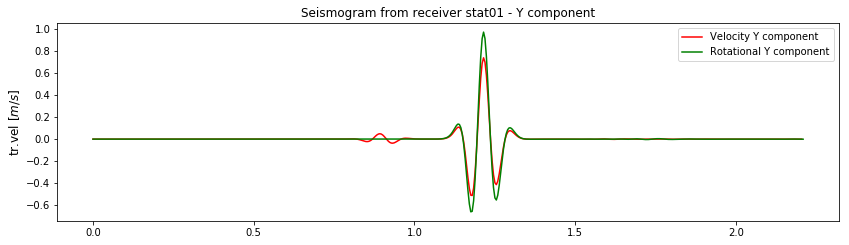

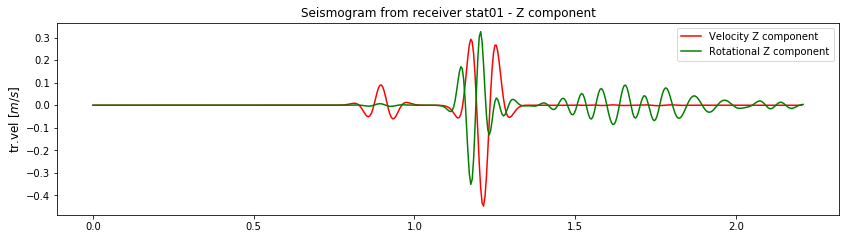

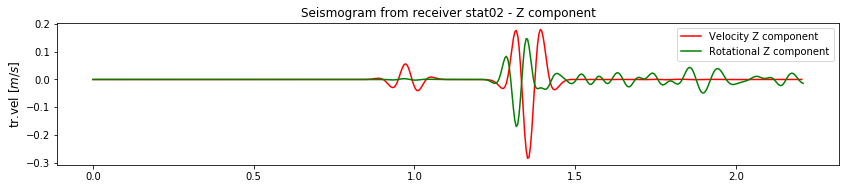

In [275]:
# plot translation


fig = plt.figure(figsize=(14,3.5))
ax = fig.add_subplot(111)
dt = st1_xv[0].stats.starttime
plt.ylabel('tr.vel ' + r'$[m/s]$', color='k',fontsize=12)
plt.plot(st1_xv[0].times(), st1_xv[0].data, 'r', label='Velocity X component')
plt.plot(st1_curlx[0].times(), st1_curlx[0].data, 'g', label='Rotational X component')
plt.title('Seismogram from receiver stat01 -  X component')
plt.legend()



fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(211)
dt = st_xv[0].stats.starttime
plt.ylabel('tr.vel ' + r'$[m/s]$', color='k',fontsize=12)
plt.plot(st1_yv[0].times(), st1_yv[0].data, 'r', label='Velocity Y component')
plt.plot(st1_curly[0].times(), st1_curly[0].data, 'g', label='Rotational Y component')
plt.title('Seismogram from receiver stat01 - Y component')
plt.legend()


fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(311)
dt = st_curlz[0].stats.starttime
plt.ylabel('tr.vel ' + r'$[m/s]$', color='k',fontsize=12)
plt.plot(st1_zv[0].times(), st1_zv[0].data, 'r', label='Velocity Z component')
plt.plot(st1_curlz[0].times(), st1_curlz[0].data, 'g', label='Rotational Z component')
plt.title('Seismogram from receiver stat01 - Z component')
plt.legend()

fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(411)
dt = st_curlz[0].stats.starttime
plt.ylabel('tr.vel ' + r'$[m/s]$', color='k',fontsize=12)
plt.plot(st2_zv[0].times(), st2_zv[0].data, 'r', label='Velocity Z component')
plt.plot(st2_curlz[0].times(), st2_curlz[0].data, 'g', label='Rotational Z component')
plt.title('Seismogram from receiver stat02 - Z component')
plt.legend()



In [276]:
#transforming coordinates
from obspy.geodetics import gps2dist_azimuth
import obspy.signal.util as su

# Source position in geographic coordinate
lat_s = 0
long_s = 0

# Define the receiver position in Cartesian coordinate and convert it
#to geographic coordinate
dist_x = 1 # in km, the distance between receiver and source in x
#direction
dist_y = 1 # in km, the distance between receiver and source in y
#direction
long_r, lat_r = su.util_lon_lat(long_s,lat_s, dist_x, dist_y)

# Backazimuth
baz = gps2dist_azimuth(lat_s, long_s, lat_r, lat_s)
print('Epicentral distance [m]: ', baz[0])
print('Theoretical azimuth [deg]: ', baz[1])
print('Theoretical backazimuth [deg]: ', baz[2])

# Rotate from ENZ to RTZ components
st_curlx.rotate(method='NE->RT',back_azimuth=baz[2])
print(st_curlx)

Epicentral distance [m]:  999.9950973756813
Theoretical azimuth [deg]:  0.0
Theoretical backazimuth [deg]:  180.0
1 Trace(s) in Stream:
.sta01..Curlx | 2019-04-18T13:49:57.000000Z - 2019-04-18T13:49:59.827382Z | 176.8 Hz, 501 samples


In [260]:
import pySW4
input_, output_ = pySW4.read_metadata('/home/ashah/Desktop/Apr16_2.in',
                                    '/home/ashah/Desktop/Apr16_2/g1.dat')

print(output_)



Outputfile({'grid': [], 'reciever': [], 'corners': []})


*Seismogram's from Anokhi's input file*

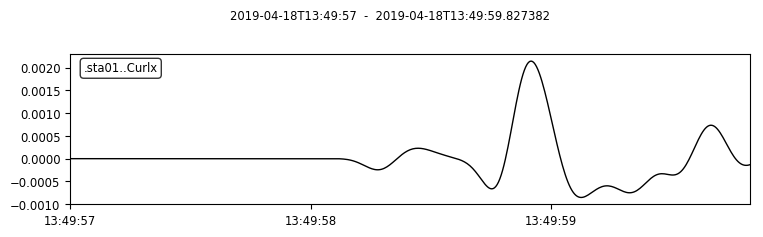

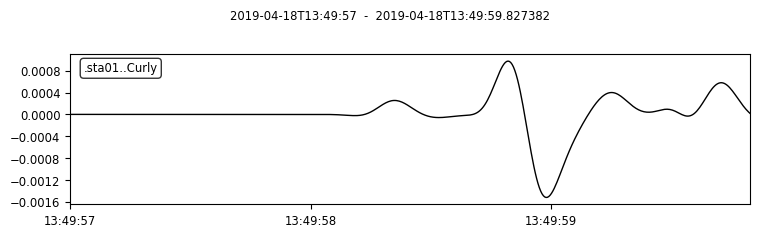

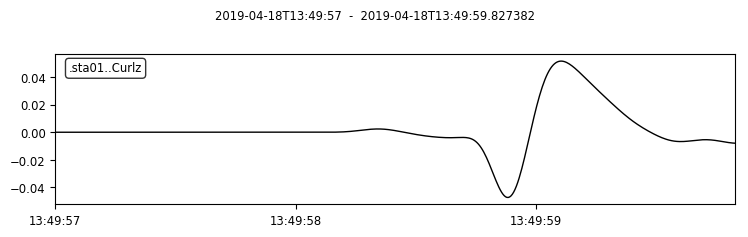

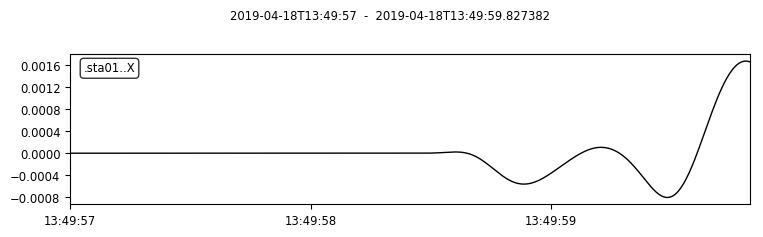

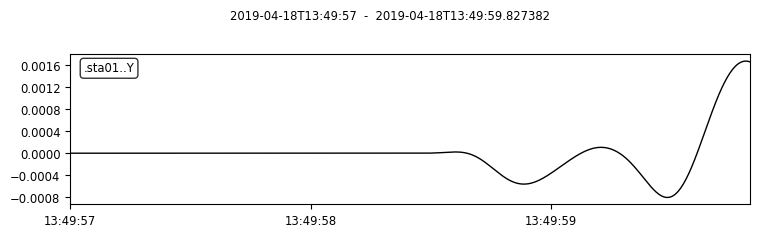

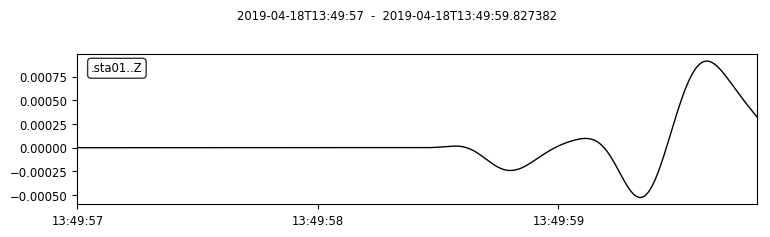

In [261]:
import obspy
from obspy import read
st_curlx = read('/home/ashah/Desktop/Apr16_2/sta01.curlx')
st_curly = read('/home/ashah/Desktop/Apr16_2/sta01.curly')
st_curlz = read('/home/ashah/Desktop/Apr16_2/sta01.curlz')
st_x = read('/home/ashah/Desktop/Apr16_2/sta01.x')
st_y = read('/home/ashah/Desktop/Apr16_2/sta01.y')
st_z = read('/home/ashah/Desktop/Apr16_2/sta01.z')
st_curlx.plot()
st_curly.plot()
st_curlz.plot()
st_x.plot()
st_y.plot()
st_z.plot()